In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt
import cPickle
from emission_functions import *
from astropy.table import Table
import trident
from decimal import Decimal

from yt.data_objects.particle_filters import add_particle_filter

/Users/dalek/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


### Originally with Ryan's sims but now for forced v. natural

In [ ]:
fn = "/Volumes/TOSHIBA EXT/r0054/redshift0054"
ds = yt.load(fn,file_style="%s.grid.cpu%%04i")
pos = [0.40328598,0.47176743,0.46131516]
rvir = 316.86

In [ ]:
sphere = ds.sphere(center=pos,radius=(rvir,'kpc'))
sphere.quantities['TotalMass']().in_units('Msun')
idx = np.where(sphere['Density'].in_cgs() > 0.1)
print sphere['Density'].max().in_cgs()/1.67e-24
mass_ism1 = np.sum(sphere['cell_mass'][idx].in_units('Msun'))
print mass_ism1

In [ ]:
idx = np.where((sphere['Density'].in_cgs() > 0.1) & (sphere['Temperature'] < 1e4))[0][0]
mass_ism2 = np.sum(sphere['CellMassMsun'])

Mdm = 1.52e12
Mstar = 2.12e11

The maximum H_NumberDensity in the simulation is: 

so I'm not going to be able to make the same cuts as the FIRE people. I guess they just have better overall resolution.
    

### Forced Refine Testing!

In [2]:
def Stars(pfilter, data):
      return data[("all", "particle_type")] == 2
add_particle_filter("stars", function=Stars, filtered_type='all',
                    requires=["particle_type"])


In [3]:
base = "/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2"
fn = base+"/RD0020/RD0020"
lines = ['HAlpha','OVI','CIV','CIII_977','SiIV']
track_name = base+"/halo_track"
args = fn.split('/')

ds = yt.load(fn)
trident.add_ion_fields(ds,['O','C','Si'])
track = Table.read(track_name, format='ascii')
track.sort('col1')
rb,rb_center,rb_width = get_refine_box(ds,ds.current_redshift,track)
redshift = ds.current_redshift
ds.add_particle_filter('stars')

box_width = ds.arr(rb_width,'code_length').in_units('kpc')

yt : [INFO     ] 2018-03-14 11:23:04,624 Parameters: current_time              = 154.801032717
yt : [INFO     ] 2018-03-14 11:23:04,624 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-03-14 11:23:04,626 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-03-14 11:23:04,627 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-03-14 11:23:04,628 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-03-14 11:23:04,629 Parameters: current_redshift          = 1.99999968795
yt : [INFO     ] 2018-03-14 11:23:04,630 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-03-14 11:23:04,631 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-03-14 11:23:04,632 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 4574/4574 [00:00<00:00, 11763.95it/s]
yt : [INFO     ] 2018-03-14 11:23:05,239 Gathering a field list (this may take a moment.)


using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
2.04999996364 0.493091 0.488119 0.501099 0.495091 0.490119 0.503099   10


In [4]:
base2 = "/Users/dalek/data/Molly/natural/nref11"
fn2 = base2+"/RD0020/RD0020"
ds2 = yt.load(fn2)
trident.add_ion_fields(ds2,['O','C','Si'])
rb2,rb_center2,rb_width2 = get_refine_box(ds2,ds2.current_redshift,track)
redshift = ds.current_redshift
ds2.add_particle_filter('stars')


yt : [INFO     ] 2018-03-14 11:23:09,341 Parameters: current_time              = 154.801187733
yt : [INFO     ] 2018-03-14 11:23:09,342 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-03-14 11:23:09,343 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-03-14 11:23:09,344 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-03-14 11:23:09,346 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-03-14 11:23:09,347 Parameters: current_redshift          = 1.99999762534
yt : [INFO     ] 2018-03-14 11:23:09,348 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-03-14 11:23:09,349 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-03-14 11:23:09,350 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 1449/1449 [00:00<00:00, 24085.80it/s]
yt : [INFO     ] 2018-03-14 11:23:09,493 Gathering a field list (this may take a moment.)


using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.99999996364 0.493032 0.487924 0.501169 0.495032 0.489924 0.503169   10


True

In [ ]:
# masses = [total,cold,cool,warm,hot]
masses = [0.,0.,0.,0.,0.,0.,0.,0.]
temp = np.log10(rb['Temperature'])
dens = rb['H_nuclei_density']
#dens = rb['Density'].in_units('g/cm**3')
masses[0] = np.sum(rb['cell_mass'].in_units('Msun'))
masses[1] = np.sum(rb[("stars", "particle_mass")].in_units('Msun'))
idx = np.where((temp < 4.) & (dens > 0.1))[0]
masses[2] = np.sum(rb['cell_mass'][idx].in_units('Msun'))
idx = np.where(temp < 4.)[0]
masses[3] = np.sum(rb['cell_mass'][idx].in_units('Msun'))
idx = np.where((temp >= 4.) & (temp < 5.))[0]
masses[4] = np.sum(rb['cell_mass'][idx].in_units('Msun'))
idx = np.where((temp >= 5.) & (temp < 6.))[0]
masses[5] = np.sum(rb['cell_mass'][idx].in_units('Msun'))
idx = np.where(temp >= 6.)[0]
masses[6] = np.sum(rb['cell_mass'][idx].in_units('Msun'))
masses[7] = np.sum(rb['metal_mass'].in_units('Msun'))

In [ ]:
# masses = [total,cold,cool,warm,hot]
masses2 = [0.,0.,0.,0.,0.,0.,0.,0.]
temp2 = np.log10(rb2['Temperature'])
dens2 = rb2['H_nuclei_density']
#dens2 = rb2['Density'].in_units('g/cm**3')
masses2[0] = np.sum(rb2['cell_mass'].in_units('Msun'))
masses2[1] = np.sum(rb2[("stars", "particle_mass")].in_units('Msun'))
idx = np.where((temp2 < 4.)& (dens2 > 0.1))[0]
masses2[2] = np.sum(rb2['cell_mass'][idx].in_units('Msun'))
idx = np.where(temp2 < 4.)[0]
masses2[3] = np.sum(rb2['cell_mass'][idx].in_units('Msun'))
idx = np.where((temp2 >= 4.) & (temp2 < 5.))[0]
masses2[4] = np.sum(rb2['cell_mass'][idx].in_units('Msun'))
idx = np.where((temp2 >= 5.) & (temp2 < 6.))[0]
masses2[5] = np.sum(rb2['cell_mass'][idx].in_units('Msun'))
idx = np.where(temp2 >= 6.)[0]
masses2[6] = np.sum(rb2['cell_mass'][idx].in_units('Msun'))
masses2[7] = np.sum(rb2['metal_mass'].in_units('Msun'))

In [ ]:
x = [0,1,2,3,4,5,6,7]
x_tick_labels = ('Total','Stellar','ISM','Cold','Cool','Warm','Hot','Metal')
plt.bar(x,np.log10(masses2),align='center',alpha=0.5,label='standard')
plt.bar(x,np.log10(masses),align='center',alpha=0.5,label='refined')


#plt.bar(x,(masses/masses[0]),align='center',alpha=0.5,label='refined')
#plt.bar(x,(masses2/masses2[0]),align='center',alpha=0.5,label='standard')
#plt.bar(x,((masses/masses[0])/(masses2/masses2[0])),align='center',alpha=0.5)#,label='refined')
#plt.bar(x,(np.array(masses)/np.array(masses2)),align='center',alpha=0.5)#,label='refined')
plt.ylim(7.5,10.5)
plt.xticks(x,('Total','Stellar','ISM','Cold','Cool','Warm','Hot','Metal'))
plt.legend()
plt.show()

In [ ]:
i = 0
while i < len(x_tick_labels):
    wanted = '%.2E' % Decimal(str(masses2[i].value))
    print x_tick_labels[i]+': '+wanted
    i = i + 1
    

In [ ]:
print np.log10(masses[2])
print np.log10(masses2[2])

print masses[2]/masses[3]
print masses2[2]/masses2[3]
print 'More of the cold gas is in the ISM in the refined simulation than in'
print 'standard simulation but it is still the LARGE majority no matter what'

In [5]:
ion_num = {'C':6,'O':8,'Si':14}
ion = 'O'

In [ ]:
print 'refined'
massesO = []
for i in range(ion_num[ion]):
    field = ion+'_p'+str(i)+'_mass'
    print field
    massesO.append(np.sum(rb[field].in_units('Msun')))
print 'standard'
massesO2 = []
for i in range(ion_num[ion]):
    field = ion+'_p'+str(i)+'_mass'
    print field
    massesO2.append(np.sum(rb2[field].in_units('Msun')))

In [ ]:
y = [0,1,2,3,4,5,6,7]
plt.bar(y,np.log10(massesO2),align='center',alpha=0.5,label='standard')
plt.bar(y,np.log10(massesO),align='center',alpha=0.5,label='refined')
#plt.bar(y,(massesO2/masses2[6]),align='center',alpha=0.5,label='standard')
#plt.bar(y,(massesO/masses[6]),align='center',alpha=0.5,label='refined')
#plt.bar(y,(np.array(massesO)/np.array(massesO2)),align='center')
plt.ylim(4.5,8)
plt.xticks(y,('OI','OII','OIII','OIV','OV','OVI','OVII','OVIII'))
plt.legend()
plt.show()

In [ ]:
oxy_tick_labels = ('OI','OII','OIII','OIV','OV','OVI','OVII','OVIII')
i = 0
while i < len(oxy_tick_labels):
    wanted = '%.2E' % Decimal(str(massesO2[i].value))
    print oxy_tick_labels[i]+': '+wanted
    i = i + 1
    

In [ ]:
print 'refined'
ion = 'C'
massesC = []
for i in range(ion_num[ion]):
    field = ion+'_p'+str(i)+'_mass'
    print field
    massesC.append(np.sum(rb[field].in_units('Msun')))
print 'standard'
massesC2 = []
for i in range(ion_num[ion]):
    field = ion+'_p'+str(i)+'_mass'
    print field
    massesC2.append(np.sum(rb2[field].in_units('Msun')))

In [ ]:
y = [0,1,2,3,4,5]
plt.bar(y,np.log10(massesC2),align='center',alpha=0.5,label='standard')
plt.bar(y,np.log10(massesC),align='center',alpha=0.5,label='refined')
#plt.bar(y,(np.array(massesC)/np.array(massesC2)),align='center')
plt.xticks(y,('CI','CII','CIII','CIV','CV','CVI'))
plt.ylim(4,7)
plt.legend()
plt.show()

In [ ]:
car_tick_labels = ('CI','CII','CIII','CIV','CV','CVI')
i = 0
while i < len(car_tick_labels):
    wanted = '%.2E' % Decimal(str(massesC2[i].value))
    print car_tick_labels[i]+': '+wanted
    i = i + 1
    

In [6]:
print 'refined'
ion = 'Si'
massesSi = []
for i in range(ion_num[ion]):
    field = ion+'_p'+str(i)+'_mass'
    print field
    massesSi.append(np.sum(rb[field].in_units('Msun')))
print 'standard'
massesSi2 = []
for i in range(ion_num[ion]):
    field = ion+'_p'+str(i)+'_mass'
    print field
    massesSi2.append(np.sum(rb2[field].in_units('Msun')))

refined
Si_p0_mass
Si_p1_mass
Si_p2_mass
Si_p3_mass
Si_p4_mass
Si_p5_mass
Si_p6_mass
Si_p7_mass
Si_p8_mass
Si_p9_mass
Si_p10_mass
Si_p11_mass
Si_p12_mass
Si_p13_mass
standard
Si_p0_mass
Si_p1_mass
Si_p2_mass
Si_p3_mass
Si_p4_mass
Si_p5_mass
Si_p6_mass
Si_p7_mass
Si_p8_mass
Si_p9_mass
Si_p10_mass
Si_p11_mass
Si_p12_mass
Si_p13_mass


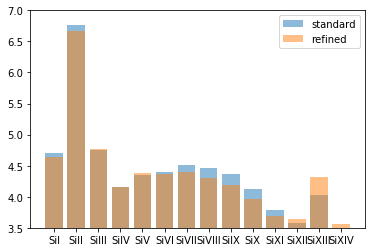

In [10]:
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.bar(y,np.log10(massesSi2),align='center',alpha=0.5,label='standard')
plt.bar(y,np.log10(massesSi),align='center',alpha=0.5,label='refined')
#plt.bar(y,(np.array(massesC)/np.array(massesC2)),align='center')
plt.xticks(y,('SiI','SiII','SiIII','SiIV','SiV','SiVI','SiVII','SiVIII','SiIX','SiX','SiXI','SiXII','SiXIII','SiXIV'))
plt.ylim(3.5,7)
plt.legend()
plt.show()

In [12]:
si_tick_labels = ('SiI','SiII','SiIII','SiIV','SiV','SiVI','SiVII','SiVIII','SiIX','SiX','SiXI','SiXII','SiXIII','SiXIV')
i = 0
while i < len(si_tick_labels):
    wanted = '%.2E' % Decimal(str(massesSi2[i].value))
    print si_tick_labels[i]+': '+wanted
    i = i + 1
    

SiI: 5.14E+04
SiII: 5.73E+06
SiIII: 5.61E+04
SiIV: 1.41E+04
SiV: 2.27E+04
SiVI: 2.49E+04
SiVII: 3.24E+04
SiVIII: 2.87E+04
SiIX: 2.30E+04
SiX: 1.35E+04
SiXI: 6.20E+03
SiXII: 3.84E+03
SiXIII: 1.06E+04
SiXIV: 1.54E+03


In [ ]:
## What is dark matter particle mass 1.2e6? 
def MustRefineParticles(pfilter, data):
      return data[("all", "particle_type")] == 4
add_particle_filter("mustrefine", function=MustRefineParticles, filtered_type='all',
                    requires=["particle_type"])


In [ ]:
ds.add_particle_filter('mustrefine')

In [ ]:
print (rb[("mustrefine", "particle_mass")].in_units('Msun')[0])
print (rb[("stars", "particle_mass")].in_units('Msun').min())
print (rb[("stars", "particle_mass")].in_units('Msun').max())

In [ ]:
np.unique(rb['all','particle_type'])